In [15]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4052,) <U51
features <type 'numpy.ndarray'> (4052, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 54.27


In [17]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [18]:
solver = CaptioningSolver(model, data, data, n_epochs=5, batch_size=128, update_rule='adam',
                                      learning_rate=0.0025, print_every=2000, save_every=1, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-3',
                                 print_bleu=False, log_path='./log/')

Sampled Caption: a man and a woman playing a game with a wii remote .


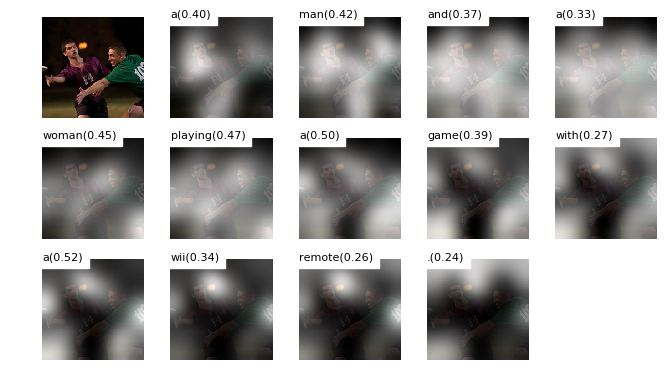

Sampled Caption: a group of people standing around a group of people .


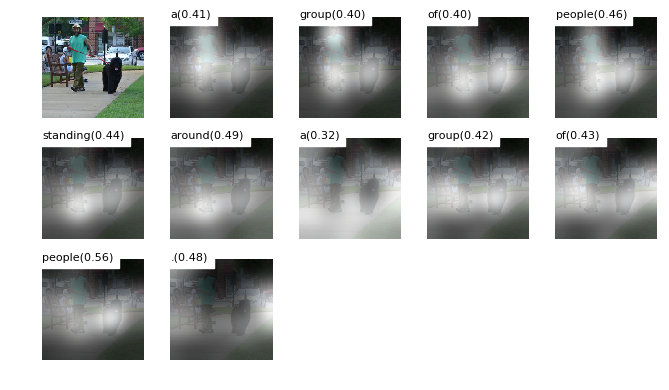

Sampled Caption: a truck is parked in a parking lot .


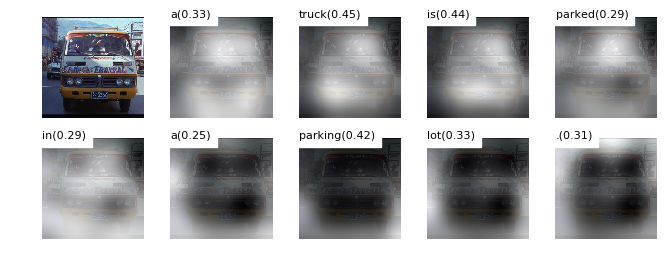

Sampled Caption: a large elephant standing next to a tree .


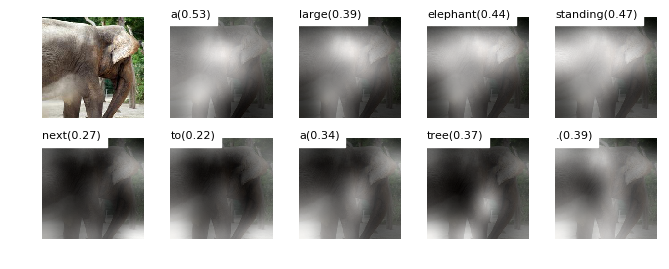

Sampled Caption: a horse pulling a carriage with a horse drawn carriage .


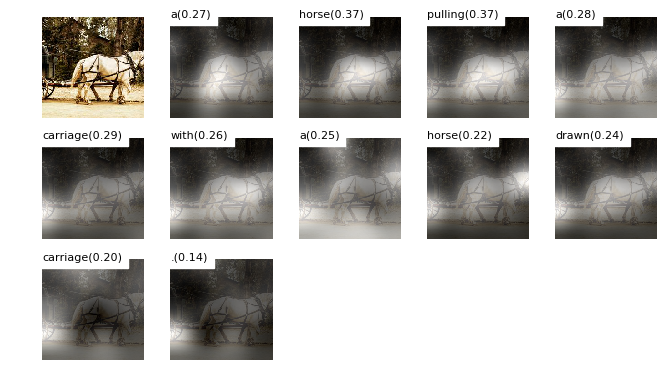

Sampled Caption: a person holding a cell phone in their hand .


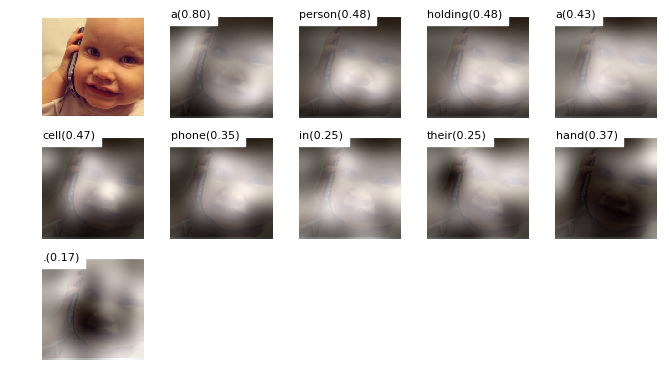

Sampled Caption: a cat sitting on a chair next to a chair .


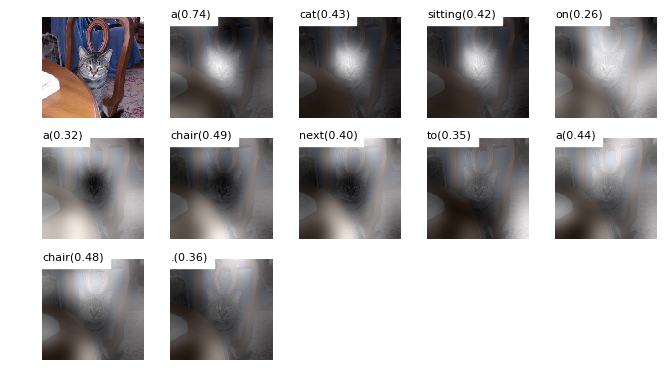

Sampled Caption: a laptop computer sitting on top of a wooden desk .


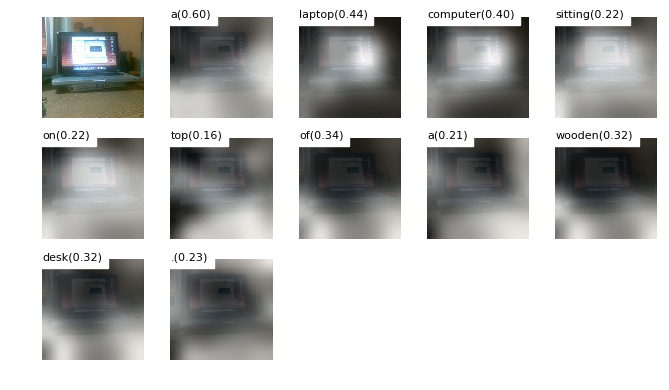

Sampled Caption: a herd of sheep standing on top of a lush green field .


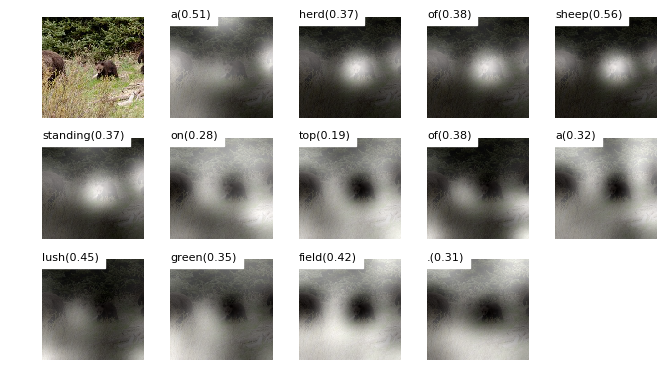

Sampled Caption: a boat is parked in a body of water .


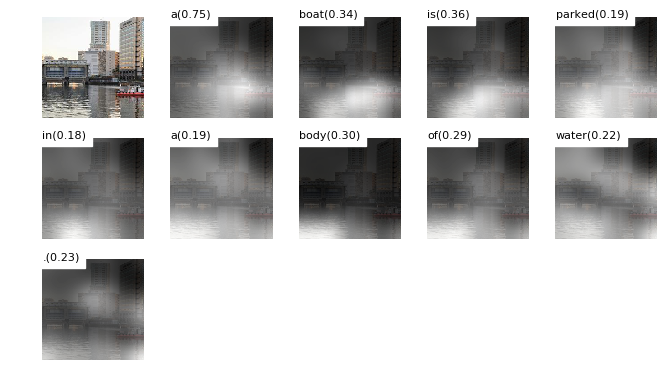

Saved ./data/val/val.candidate.captions.pkl..


In [19]:
solver.test(data, split='val')

In [ ]:
test = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4048,) <U51
features <type 'numpy.ndarray'> (4048, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 105.33


Sampled Caption: a stop sign with a blue sky in the background .


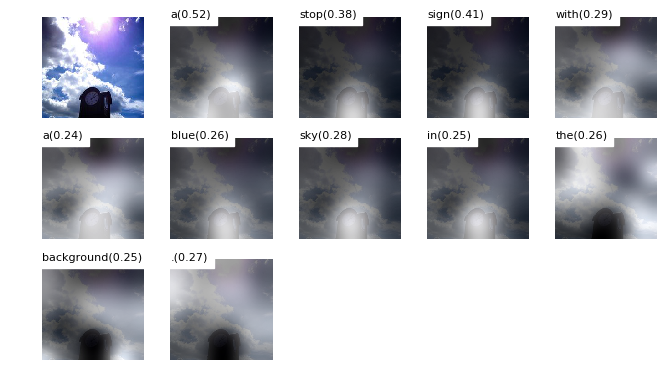

Sampled Caption: a plate with a sandwich and a cup of coffee .


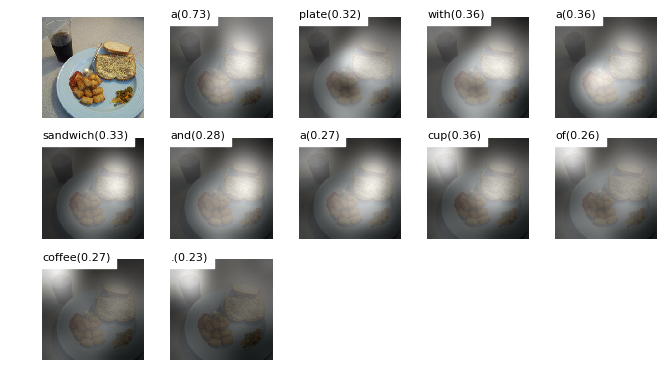

Sampled Caption: a cat laying on a bed with a cat .


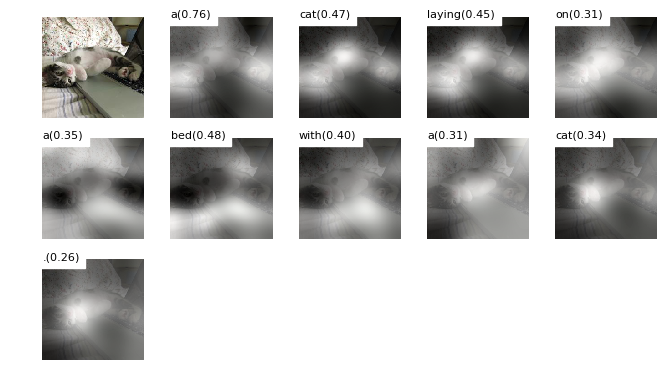

Sampled Caption: a bus is parked on the side of a road .


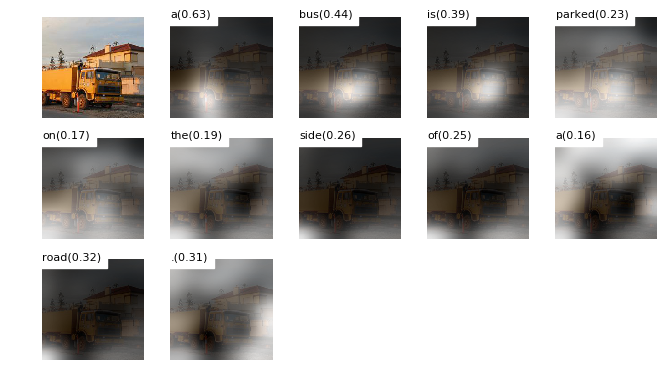

Sampled Caption: a group of people sitting around a table with a bunch of flowers .


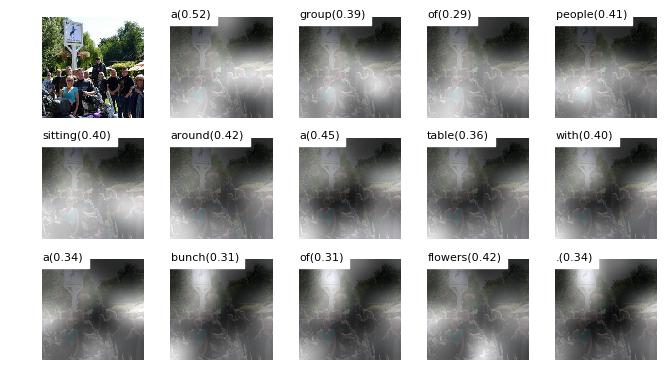

Sampled Caption: a man and a boy playing with a frisbee .


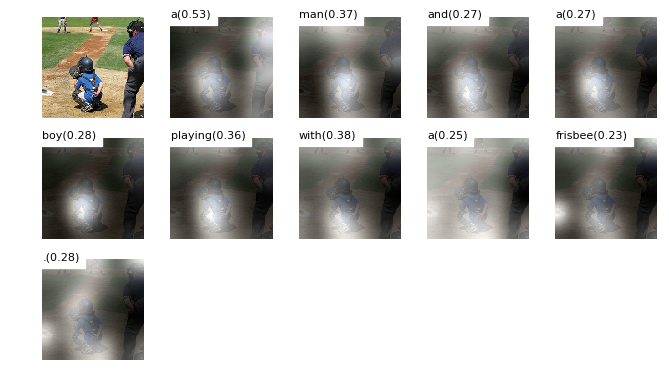

Sampled Caption: a group of people standing around a red and white train .


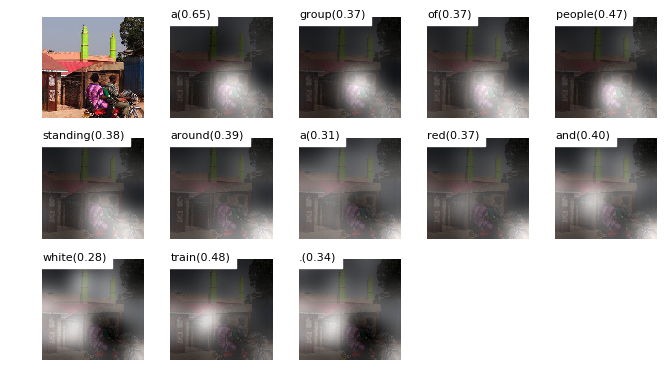

Sampled Caption: a living room with a large window and a fireplace .


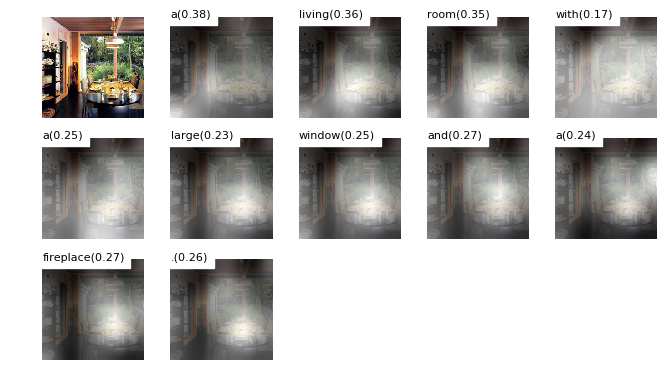

Sampled Caption: a group of sheep standing on top of a lush green field .


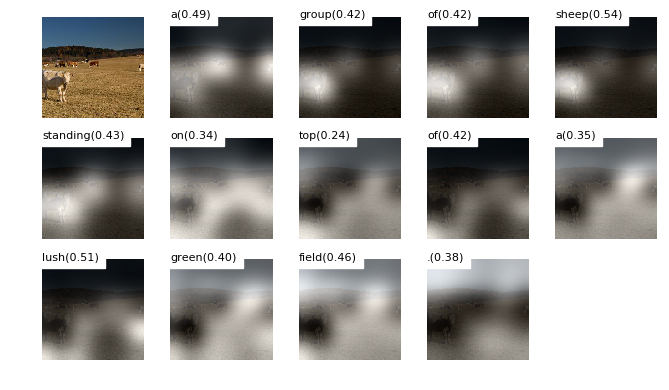

Sampled Caption: a man is skiing down a snowy hill .


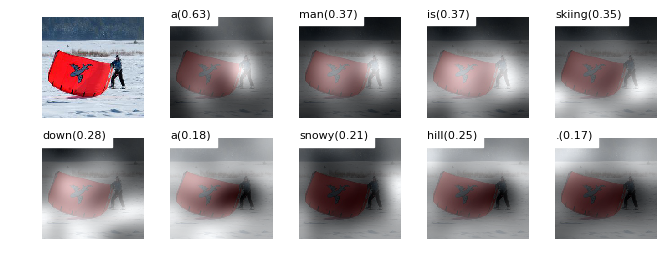

In [ ]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [ ]:
a,b = evaluate(data_path='./data', split='val',get_scores=True)

In [ ]:
b.keys()

In [ ]:
evaluate(data_path='./data', split='test')

In [ ]:
len(b['Bleu_3'][0])

In [ ]:
import random

In [ ]:
bleu3 =[]
for i in range(4):
    secure_random = random.SystemRandom()
    for j in range(250):
        bleu3.append(secure_random.choice(b['Bleu_3'][0][i]))


In [ ]:
len(bleu3)

In [ ]:
plt.hist(bleu3,color='r')
plt.title('Histogram of Bleu_3 Scores', fontsize=20)
plt.xlabel('Bleu_3 score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [ ]:
cider =[]
for i in range(1000):
    secure_random = random.SystemRandom()
    cider.append(secure_random.choice(b['CIDEr'][0].tolist()))

In [ ]:
plt.hist(cider,color='r')
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()